In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [11]:
# 결측치
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
# 타킷추출
dfy = titanic['survived'].copy()
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [13]:
# 피쳐추출
feature_list = ['pclass', 'sex', 'age']
dfX = titanic[feature_list].copy()
dfX

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [14]:
dfX['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX['sex'].value_counts()

sex
1    577
0    314
Name: count, dtype: int64

In [16]:
dfX['age'].isnull().sum()


np.int64(177)

In [17]:
dfX['age'].fillna( dfX['age'].mean(), inplace=True)
dfX['age'].isnull().sum()

/tmp/ipykernel_1631/2387617518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfX['age'].fillna( dfX['age'].mean(), inplace=True)


np.int64(0)

In [18]:
dfX.tail()

,pclass,sex,age
886,2,1,27.000000
887,1,0,19.000000
888,3,0,29.699118
889,1,1,26.000000
890,3,1,32.000000


In [19]:
# 원핫 인코딩

dfX['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelBinarizer

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX['pclass']),
                    columns=['c1','c2','c3'],
                    index = dfX.index)

dfX2

,c1,c2,c3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [21]:
dfX = pd.concat([dfX, dfX2], axis=1)
dfX


,pclass,sex,age,c1,c2,c3
0,3,1,22.000000,0,0,1
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,1
3,1,0,35.000000,1,0,0
4,3,1,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,1,27.000000,0,1,0
887,1,0,19.000000,1,0,0
888,3,0,29.699118,0,0,1
889,1,1,26.000000,1,0,0


In [22]:
dfX.drop(['pclass'], axis=1, inplace=True)
dfX

,sex,age,c1,c2,c3
0,1,22.000000,0,0,1
1,0,38.000000,1,0,0
2,0,26.000000,0,0,1
3,0,35.000000,1,0,0
4,1,35.000000,0,0,1
...,...,...,...,...,...
886,1,27.000000,0,1,0
887,0,19.000000,1,0,0
888,0,29.699118,0,0,1
889,1,26.000000,1,0,0


# 데이터 분할

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy,
                                                    test_size=0.25, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 5), (223, 5), (668,), (223,))

# 의사 결정 나무 생성

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier( criterion='gini', max_depth=3, min_samples_leaf=5)

#학습
dtmodel.fit(X_train,y_train)
dtmodel

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [25]:
y_pred = dtmodel.predict(X_train)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [26]:
pd.crosstab(y_train, y_pred, margins=True)

col_0,0,1,All
survived,,,
0,360,50,410
1,73,185,258
All,433,235,668


In [27]:
#graphviz 설치
!sudo apt-get update
!sudo apt-get  install -y graphviz

Hit:1 https://dl.yarnpkg.com/debian stable InRelease
Hit:2 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease
Hit:3 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease       
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease                         
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease               
Hit:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease                 
Hit:6 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease            
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# 파이썬 패키지 설치
!pip install graphviz pydotplus

In [28]:
from IPython.display import Image# for visualizing the tree
import pydotplus
 
# 의사 결정 나무를 시각화하기 위해서 라이브러리를 임포트합니다.
from sklearn.tree import export_graphviz

In [29]:
# 시각화를 위한 함수를 작성한다.

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    print(graph)
    graph.write_png(png_file_to_save)
    return Image(graph.create_png())

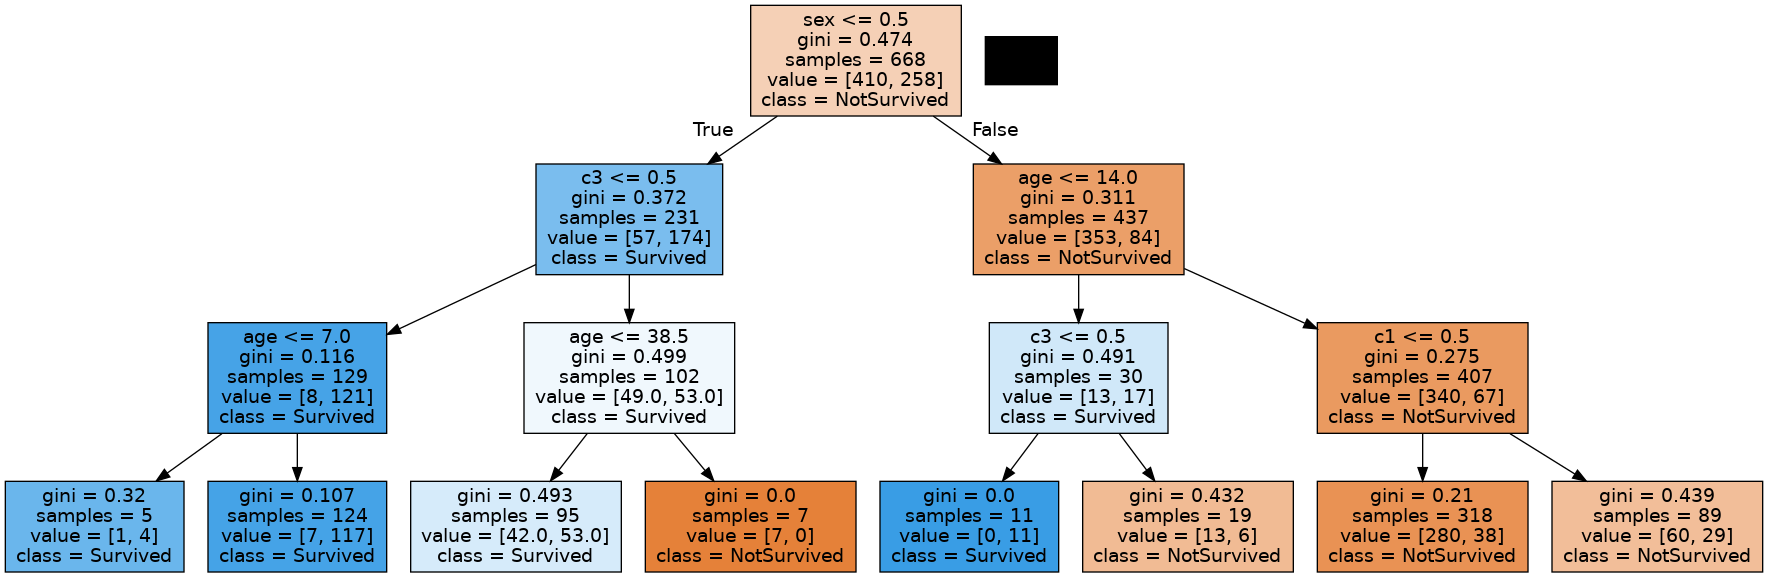

In [30]:
tree_graph_to_png(tree=dtmodel, feature_names=dfX.columns.values, class_names=['NotSurvived','Survived'],
                  png_file_to_save='decision_tree.png')